# Observations and Insights

### Imports and Read Files

#### Imports 

In [827]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np


#### Read Files

In [828]:

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


### Table's of given Data

#### Mouse Metadata Table

In [829]:
# Table Outcome
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


#### Study Results Table

In [830]:
# Table Outcome
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


#### Merged 'Mouse Metadata' & 'Study Results' Table

In [831]:
# Merge two dataframes using an inner join
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


#### Data information on given data

In [832]:
# Printing out the columns of 'merge_df' data frame
mm = list(mouse_metadata)
print(f"Data from 'mouse_metadata'...{mm}")
print("These values do not change... DO NOT TOUCH OR CHANGE VALUES")

print(" - " * 10)
sr = list(study_results)
print(f"Data from 'study_results'...{sr}")
print("These values do change... APPLY ARGUEMENTS TO VALUES")


Data from 'mouse_metadata'...['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']
These values do not change... DO NOT TOUCH OR CHANGE VALUES
 -  -  -  -  -  -  -  -  -  - 
Data from 'study_results'...['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']
These values do change... APPLY ARGUEMENTS TO VALUES


### Amount of Mice in the data

In [833]:
mice_count = merge_df

# Add Column to 'mice_count' since we need two 'Mouse ID'... one for count and the other is for index
# Also... cannot have two same names... 'Mouse ID' and 'Mouse ID' cannot work together in '.agg' formula
mice_count.loc[:, "Total of Studies"] = merge_df["Mouse ID"]

# Fource 'Mouse ID' as index and keep column of 'Total of Mice' while we count the amount of 'Total of Mices' by its 'Mouse ID'
# if it has a same 'Mouse ID', it will count into that index...
mice_count = mice_count.groupby(['Mouse ID'], as_index=False).agg({'Total of Studies': 'count'})

# Get the value of how many mices there are by counting 'Mouse ID'
mice_number = mice_count["Mouse ID"].count()
print(f"There are {mice_number} mice in the data.")

There are 249 mice in the data.


### Clean Merged Table

In [834]:
mice_agg = merge_df

# Add Column to 'mice_count' since we need two 'Mouse ID'... one for count and the other is for index
# Also... cannot have two same names... 'Mouse ID' and 'Mouse ID' cannot work together in '.agg' formula
mice_agg.loc[:, "Total of Mice"] = merge_df["Mouse ID"]

# Fource 'Mouse ID' as index and keep column of 'Total of Mice' while we count the amount of 'Total of Mices' by its 'Mouse ID'
# if it has a same 'Mouse ID', it will count into that index...
mice_agg = mice_agg.groupby(['Mouse ID','Drug Regimen', 'Sex', 'Age_months','Weight (g)'], as_index=False).agg({
    'Total of Studies': 'count',
    'Timepoint':'sum',
    'Tumor Volume (mm3)':'mean',
    'Metastatic Sites':'sum'})

# Convert 'Age' into 'Total Count'
mice_agg = mice_agg.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Average (mm3)"})
mice_agg = mice_agg.rename(columns={"Timepoint": "Timepoint Total"})
mice_agg = mice_agg.rename(columns={"Metastatic Sites": "Metastatic Sites Total"})

mice_agg

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Total of Studies,Timepoint Total,Tumor Volume Average (mm3),Metastatic Sites Total
0,a203,Infubinol,Female,20,23,10,225,56.312708,11
1,a251,Infubinol,Female,21,25,10,225,55.237095,8
2,a262,Placebo,Female,17,29,10,225,58.611631,23
3,a275,Ceftamin,Female,20,28,10,225,52.770965,12
4,a366,Stelasyn,Female,16,29,7,105,54.639906,1
...,...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,3,15,46.942214,0
245,z578,Ramicane,Male,11,16,10,225,38.411510,0
246,z581,Infubinol,Female,24,25,10,225,53.979584,20
247,z795,Naftisol,Female,13,29,10,225,54.880317,14


### Input Mouse ID and Specific Mouse Table Output

#### Input Code

In [835]:
# Example of what we want by having user input the value of the mouse
mouse_id_grouped_by = mice_agg.set_index('Mouse ID')
mouse_id_grouped_by.loc[['a203']]


,Drug Regimen,Sex,Age_months,Weight (g),Total of Studies,Timepoint Total,Tumor Volume Average (mm3),Metastatic Sites Total
Mouse ID,,,,,,,,
a203,Infubinol,Female,20,23,10,225,56.312708,11


#### Printing index list of mice names ('Mouse ID' values)

In [836]:
# Get the index/rows of the above DataFrame 
# Using tolist() function
print("\nThis is index of DataFrame:\n")
index_list = mouse_id_grouped_by.index.tolist()
print(index_list)


This is index of DataFrame:

['a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a411', 'a444', 'a457', 'a492', 'a520', 'a577', 'a644', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963', 'b128', 'b313', 'b447', 'b487', 'b559', 'b742', 'b759', 'b879', 'c139', 'c264', 'c282', 'c302', 'c326', 'c402', 'c458', 'c559', 'c580', 'c757', 'c758', 'c766', 'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd251', 'd474', 'e213', 'e227', 'e291', 'e476', 'e584', 'e662', 'f129', 'f234', 'f278', 'f345', 'f394', 'f436', 'f545', 'f932', 'f966', 'f993', 'g107', 'g288', 'g296', 'g316', 'g497', 'g558', 'g570', 'g791', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531', 'i177', 'i334', 'i386', 'i477', 'i557', 'i635', 'i669', 'i738', 'i901', 'j119', 'j235', 'j246', 'j296', 'j365', 'j755', 'j913', 'j984', 'j989', 'k210', 'k382', 'k403', 'k483', 'k510', 'k603', 'k754', 'k804', 'k862', 'k894', 'l215', 'l264', 'l471', 'l490', 'l509', 'l558', 'l661', 'l700', 'l725', 'l733', 'l872', 'l897', 'm133', 'm269', 'm331', 'm546', '

In [837]:
# User Input on what mice they want...
print("Here is a list of mouse id's")
print(" - " * 10)
print("'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a411', 'a444', 'a457', 'a492', 'a520', 'a577', 'a644', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963', 'b128', 'b313', 'b447', 'b487', 'b559', 'b742', 'b759', 'b879', 'c139', 'c264', 'c282', 'c302', 'c326', 'c402', 'c458', 'c559', 'c580', 'c757', 'c758', 'c766', 'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd251', 'd474', 'e213', 'e227', 'e291', 'e476', 'e584', 'e662', 'f129', 'f234', 'f278', 'f345', 'f394', 'f436', 'f545', 'f932', 'f966', 'f993', 'g107', 'g288', 'g296', 'g316', 'g497', 'g558', 'g570', 'g791', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531', 'i177', 'i334', 'i386', 'i477', 'i557', 'i635', 'i669', 'i738', 'i901', 'j119', 'j235', 'j246', 'j296', 'j365', 'j755', 'j913', 'j984', 'j989', 'k210', 'k382', 'k403', 'k483', 'k510', 'k603', 'k754', 'k804', 'k862', 'k894', 'l215', 'l264', 'l471', 'l490', 'l509', 'l558', 'l661', 'l700', 'l725', 'l733', 'l872', 'l897', 'm133', 'm269', 'm331', 'm546', 'm550', 'm601', 'm650', 'm756', 'm957', 'n304', 'n364', 'n482', 'n630', 'n671', 'n678', 'n763', 'n923', 'n967', 'o287', 'o302', 'o331', 'o523', 'o562', 'o725', 'o795', 'o809', 'o813', 'o848', 'o926', 'o973', 'p136', 'p189', 'p310', 'p387', 'p438', 'p981', 'q119', 'q132', 'q483', 'q511', 'q582', 'q597', 'q610', 'q633', 'q787', 'r107', 'r157', 'r554', 'r604', 'r701', 'r811', 'r850', 'r921', 'r944', 's121', 's141', 's152', 's166', 's185', 's187', 's337', 's508', 's565', 's619', 's710', 't198', 't451', 't565', 't573', 't718', 't724', 't994', 'u149', 'u153', 'u196', 'u327', 'u364', 'u946', 'v199', 'v289', 'v295', 'v339', 'v409', 'v603', 'v719', 'v764', 'v766', 'v835', 'v923', 'v989', 'v991', 'w140', 'w150', 'w151', 'w167', 'w193', 'w350', 'w422', 'w540', 'w575', 'w584', 'w678', 'w697', 'w746', 'w914', 'x111', 'x209', 'x226', 'x264', 'x336', 'x401', 'x402', 'x581', 'x613', 'x773', 'x822', 'x930', 'y163', 'y260', 'y449', 'y478', 'y601', 'y769', 'y793', 'y865', 'z234', 'z314', 'z435', 'z578', 'z581', 'z795', 'z969'")
print(" - " * 10)
mice_input = input("What mouse would you like to search for? ")
print(f"The mouse you looked for is {mice_input}")

mouse_id_grouped_by = mice_agg.set_index('Mouse ID')
mouse_selected = mouse_id_grouped_by.loc[[mice_input]]
mouse_selected


Here is a list of mouse id's
 -  -  -  -  -  -  -  -  -  - 
'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a411', 'a444', 'a457', 'a492', 'a520', 'a577', 'a644', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963', 'b128', 'b313', 'b447', 'b487', 'b559', 'b742', 'b759', 'b879', 'c139', 'c264', 'c282', 'c302', 'c326', 'c402', 'c458', 'c559', 'c580', 'c757', 'c758', 'c766', 'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd251', 'd474', 'e213', 'e227', 'e291', 'e476', 'e584', 'e662', 'f129', 'f234', 'f278', 'f345', 'f394', 'f436', 'f545', 'f932', 'f966', 'f993', 'g107', 'g288', 'g296', 'g316', 'g497', 'g558', 'g570', 'g791', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531', 'i177', 'i334', 'i386', 'i477', 'i557', 'i635', 'i669', 'i738', 'i901', 'j119', 'j235', 'j246', 'j296', 'j365', 'j755', 'j913', 'j984', 'j989', 'k210', 'k382', 'k403', 'k483', 'k510', 'k603', 'k754', 'k804', 'k862', 'k894', 'l215', 'l264', 'l471', 'l490', 'l509', 'l558', 'l661', 'l700', 'l725', 'l733', 'l872', 'l897', 'm13

,Drug Regimen,Sex,Age_months,Weight (g),Total of Studies,Timepoint Total,Tumor Volume Average (mm3),Metastatic Sites Total
Mouse ID,,,,,,,,
a203,Infubinol,Female,20,23,10,225,56.312708,11


In [838]:
mouse_selected_number = mouse_selected["Total of Studies"][0]
print(f"There are {mouse_selected_number} mice studies for 'Mouse ID': '{mice_input}'")

There are 10 mice studies for 'Mouse ID': 'a203'


# Summary Statistics

### Testing Table's and Arguements

#### Variance Test Table

In [839]:
# make copy of 'merge_df' with col. 'Mouse ID' and 'Tumor Volume (mm3)'
var_test = merge_df[["Mouse ID","Tumor Volume (mm3)"]]

# force 'Mouse ID' as index while applying variance as arguement
var_test = var_test.groupby(["Mouse ID"]).var()

# print dataframe
var_test

# var_numpy = np.var(temperatures,ddof = 0)
# print(f"The population variance using the NumPy module is {var_numpy}")

,Tumor Volume (mm3)
Mouse ID,
a203,50.407041
a251,51.740730
a262,84.759928
a275,36.322924
a366,38.415384
...,...
z435,3.464898
z578,17.969628
z581,29.827123


#### Standard Deviation Test Table

In [840]:
# make copy of 'merge_df' with col. 'Mouse ID' and 'Tumor Volume (mm3)'
std_test = merge_df[["Mouse ID","Tumor Volume (mm3)"]]

# force 'Mouse ID' as index while applying variance as arguement
std_test = std_test.groupby(["Mouse ID"]).std()

# print dataframe
std_test


# sd_numpy = np.std(temperatures,ddof = 0)
# print(f"The population standard deviation using the NumPy module is {sd_numpy}")

,Tumor Volume (mm3)
Mouse ID,
a203,7.099792
a251,7.193103
a262,9.206515
a275,6.026850
a366,6.198015
...,...
z435,1.861424
z578,4.239060
z581,5.461421


### Table of Summary Statistic

#### Creating Table Code

In [841]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_tumor = merge_df

# Add Column to 'Tumor Volume Median/Variance/Standard Deviation/SEM' since we need four 'Tumor Volume (mm3)'... one for count and the other is for index
# Also... cannot have two same names... 'Mouse ID' and 'Mouse ID' cannot work together in '.agg' formula
summary_tumor.loc[:, "Tumor Volume Mean"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume Median"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume Variance"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume Standard Deviation"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume SEM"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume Min"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume Max"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume Mode"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume Range"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume SEM"] = merge_df["Tumor Volume (mm3)"]


# delete Columns
del summary_tumor['Drug Regimen']
del summary_tumor['Sex']
del summary_tumor['Age_months']
del summary_tumor['Weight (g)']
del summary_tumor['Timepoint']
del summary_tumor['Metastatic Sites']
del summary_tumor['Total of Studies']
del summary_tumor['Total of Mice']

summary_tumor


,Mouse ID,Tumor Volume (mm3),Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM,Tumor Volume Min,Tumor Volume Max,Tumor Volume Mode,Tumor Volume Range
0,k403,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,k403,38.825898,38.825898,38.825898,38.825898,38.825898,38.825898,38.825898,38.825898,38.825898,38.825898
2,k403,35.014271,35.014271,35.014271,35.014271,35.014271,35.014271,35.014271,35.014271,35.014271,35.014271
3,k403,34.223992,34.223992,34.223992,34.223992,34.223992,34.223992,34.223992,34.223992,34.223992,34.223992
4,k403,32.997729,32.997729,32.997729,32.997729,32.997729,32.997729,32.997729,32.997729,32.997729,32.997729
...,...,...,...,...,...,...,...,...,...,...,...
1888,z969,63.145652,63.145652,63.145652,63.145652,63.145652,63.145652,63.145652,63.145652,63.145652,63.145652
1889,z969,65.841013,65.841013,65.841013,65.841013,65.841013,65.841013,65.841013,65.841013,65.841013,65.841013
1890,z969,69.176246,69.176246,69.176246,69.176246,69.176246,69.176246,69.176246,69.176246,69.176246,69.176246
1891,z969,70.314904,70.314904,70.314904,70.314904,70.314904,70.314904,70.314904,70.314904,70.314904,70.314904


#### Table outcome of 'Summary Statistic Table'

In [865]:
sum_tumor = summary_tumor.groupby(['Mouse ID'], as_index=False).agg({'Tumor Volume Mean': 'mean', 'Tumor Volume Median':'median','Tumor Volume Variance':'var','Tumor Volume Standard Deviation':'std','Tumor Volume Min':'min','Tumor Volume Max':'max'})
sum_tumor

sum_tumor = summary_tumor.groupby(['Mouse ID'], as_index=False).agg({'Tumor Volume Mean': 'mean', 'Tumor Volume Median':'median','Tumor Volume Variance':'var','Tumor Volume Standard Deviation':'std','Tumor Volume Min':'min','Tumor Volume Max':'max','Tumor Volume SEM':'sem'})
sum_tumor
# Mean: avg

# Median: Middle value 
# Variance: ...
#   ex. 10 values given
#           j = (3+8+6+10+12+9+11+10+12+7)/10 (mean first) --> j = 8.8
#       Then... we take each value minus j
#           3 - j --> 3 - 8.8 = -5.8
#           8 - j --> 8 - 8.8 = -.8
#           ...
#       Then... we square the outcome of each value 
#           (-5.8)^2 = 33.64
#           (-.8)^2 = 0.64
#           ...
#       Then we add up all of the squared values...
#           33.64 + 0.64 + ... = 73.6
#       Then we divide its total by the amount of values we used
#           73.6/10 = 7.36
#       7.36 is our variance in this example 

# Max: maximum val 
# Min: mininum val
# SEM: calculate standard error of the mean 

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mouse ID,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Min,Tumor Volume Max,Tumor Volume SEM
0,a203,56.312708,55.983272,50.407041,7.099792,45.000000,67.973419,2.245151
1,a251,55.237095,55.938620,51.740730,7.193103,45.000000,65.525743,2.274659
2,a262,58.611631,58.572588,84.759928,9.206515,45.000000,70.717621,2.911356
3,a275,52.770965,52.044750,36.322924,6.026850,45.000000,62.999356,1.905857
4,a366,54.639906,55.265582,38.415384,6.198015,45.000000,63.440686,2.342629
...,...,...,...,...,...,...,...,...
244,z435,46.942214,47.115980,3.464898,1.861424,45.000000,48.710661,1.074693
245,z578,38.411510,38.160380,17.969628,4.239060,30.638696,45.000000,1.340508
246,z581,53.979584,53.062175,29.827123,5.461421,45.000000,62.754451,1.727053
247,z795,54.880317,55.613879,53.416711,7.308674,45.000000,65.741070,2.311206


# Bar and Pie Charts

### Bar Chart: Total Number of Timepoints (tested mice) (pyplot)

In [843]:
# Prints out the index of 'Drugs Regimen' to put it in our bar chart
list_drugs = mice_agg['Drug Regimen'].value_counts()
list_drugs = list_drugs.index.tolist()
list_drugs

['Placebo',
 'Ketapril',
 'Naftisol',
 'Ceftamin',
 'Capomulin',
 'Ramicane',
 'Propriva',
 'Infubinol',
 'Zoniferol',
 'Stelasyn']

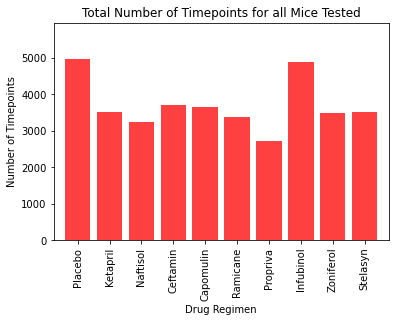

In [844]:
drug_regimen_df = mice_agg.groupby(['Drug Regimen'], as_index=False).agg({
    'Timepoint Total':'sum'})

drug_regimen = drug_regimen_df['Drug Regimen']

# Prints out the index of 'Drugs Regimen' to put it in our bar chart
list_drugs = mice_agg['Drug Regimen'].value_counts()
list_drugs = list_drugs.index.tolist()
list_drugs

# x_axis = [0 1 2 3 4 5 6 7 8 9] ... 0 is Capomulin 1 is Ramicane etc.
x_axis = np.arange(len(drug_regimen))

# # y_axis is the timepoint values from 'drug_regimen_df' which is 0:15600 and 1:21450 
y_axis = drug_regimen_df['Timepoint Total']

plt.bar(x_axis, y_axis, color='r', alpha=0.75, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list_drugs, rotation="vertical")

# Sets the x limits of the current chart
# len(x_axis) = 2...then 2 - 0.25 is 1.75  1.75 value is making sure the bar is not far away from center 
plt.xlim(-0.75, len(x_axis)- .25)

# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+1000)


# Give our chart some labels and a tile
plt.title("Total Number of Timepoints for all Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/Drugs_Total_Timepoint_pyplot_bar.png")
plt.show()

### Bar Chart: Total Number of Timepoints (tested mice) (pandas)

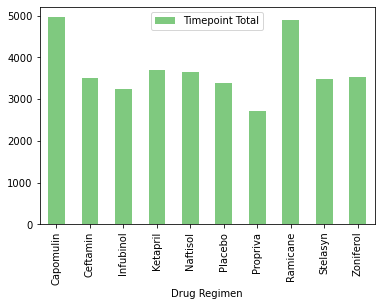

In [860]:
# create a pandas Bar plot
drug_regimen_df.plot(x ='Drug Regimen', y='Timepoint Total', kind='bar', cmap='Accent');

drug_regimen_df

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/Drugs_Regimen_pandas_bar.png")
plt.show()


### Pie Chart: Distribution of Female V. Male Mice (pyplot)

#### Table for Gender Sum and Mean

In [846]:
gender_sum_df = mice_agg.groupby(['Sex','Mouse ID'], as_index=False).agg({
    'Total of Studies':'sum',
    'Tumor Volume Average (mm3)':'sum',
    'Timepoint Total':'sum',
    'Metastatic Sites Total':'sum',
    'Age_months':'sum',
    'Weight (g)':'sum'
    })

gender_sum_df

gender_sum_clean_table = gender_sum_df.groupby(['Sex'], as_index=False).agg({
    'Total of Studies':'sum',
    'Tumor Volume Average (mm3)':'sum',
    'Timepoint Total':'sum',
    'Metastatic Sites Total':'sum',
    'Age_months':'sum',
    'Weight (g)':'sum'
    })

gender_sum_clean_table = gender_sum_clean_table.set_index('Sex')
gender_sum_clean_table

,Total of Studies,Tumor Volume Average (mm3),Timepoint Total,Metastatic Sites Total,Age_months,Weight (g)
Sex,,,,,,
Female,935,6216.14336,18170,996,1437,3258
Male,958,6150.64626,18880,938,1733,3245


In [847]:

gender_mean_df = mice_agg.groupby(['Sex','Mouse ID'], as_index=False).agg({
    'Total of Studies':'mean',
    'Tumor Volume Average (mm3)':'mean',
    'Timepoint Total':'mean',
    'Metastatic Sites Total':'mean',
    'Age_months':'mean',
    'Weight (g)':'mean'
    })

gender_mean_df

gender_mean_clean_table = gender_mean_df.groupby(['Sex'], as_index=False).agg({
    'Total of Studies':'mean',
    'Tumor Volume Average (mm3)':'mean',
    'Timepoint Total':'mean',
    'Metastatic Sites Total':'mean',
    'Age_months':'mean',
    'Weight (g)':'mean'
    })

gender_mean_clean_table = gender_mean_clean_table.set_index('Sex')
gender_mean_clean_table

,Total of Studies,Tumor Volume Average (mm3),Timepoint Total,Metastatic Sites Total,Age_months,Weight (g)
Sex,,,,,,
Female,7.540323,50.130188,146.532258,8.032258,11.58871,26.274194
Male,7.664000,49.205170,151.040000,7.504000,13.86400,25.960000


In [848]:

male_gender_only = gender_sum_df.loc[gender_sum_df["Sex"] == "Male", :]
male_tot = male_gender_only.count()
male_tot = male_tot[0]

female_gender_only = gender_sum_df.loc[gender_sum_df["Sex"] == "Female", :]
female_tot = female_gender_only.count()
female_tot = female_tot[0]

print(f"Amount of females: {female_tot}")
print(f"Amount of males: {male_tot}")


Amount of females: 124
Amount of males: 125


#### Pie Chart of Gender

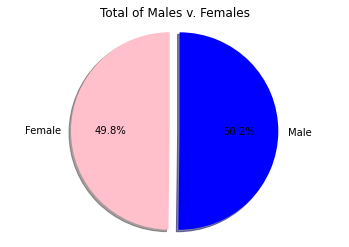

In [849]:
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [female_tot, male_tot]

# The colors of each section of the pie chart
colors = ["pink", "blue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title('Total of Males v. Females')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/Gender_Tot_pyplot_pie.png")
plt.show()


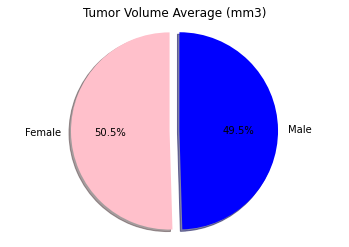

In [850]:
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [gender_mean_clean_table['Tumor Volume Average (mm3)'][0], gender_mean_clean_table['Tumor Volume Average (mm3)'][1]]

# The colors of each section of the pie chart
colors = ["pink", "blue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title('Tumor Volume Average (mm3)')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/Gender_Avg_Tumor_pyplot_pie.png")
plt.show()

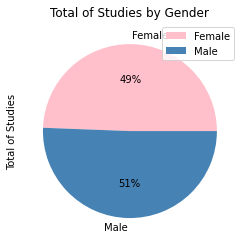

In [861]:
gender_sum_clean_table.plot(kind='pie', y='Total of Studies', autopct='%1.0f%%',
                                colors = ['pink', 'steelblue'],
                                title='Total of Studies by Gender')

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/Total_Studies_pandas_pie.png")
plt.show()

# Quartiles, Outliers and Boxplots

#### Graph of All Drugs together (without Legend)

In [852]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Merge two dataframes using an inner join
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df

max_four_drug_df = merge_df.groupby(['Drug Regimen','Mouse ID', 'Tumor Volume (mm3)'], as_index=False).agg({
    'Timepoint':'max',
    })

max_four_drug_df

# Prints out the index of 'Drugs Regimen' to put it in our bar chart
list_four_drugs = max_four_drug_df['Drug Regimen'].value_counts()
list_four_drugs = list_four_drugs.index.tolist()
list_four_drugs
# prints out ['Placebo','Ketapril','Naftisol','Ceftamin','Capomulin','Zoniferol','Propriva','Infubinol','Ramicane','Stelasyn']

#'capomulin' drug
# In the data, it finds the string 'Capomulin' in the column 'Drug Regimen' then it seperates itself 
capomulin_only = max_four_drug_df.loc[max_four_drug_df["Drug Regimen"] == "Capomulin", :]

capomulin_max_volume_mice = capomulin_only.groupby(['Drug Regimen','Mouse ID'])['Tumor Volume (mm3)'].max()
maximum_of_capomulin = capomulin_only[capomulin_only['Timepoint']==capomulin_only['Timepoint'].max()]
maximum_of_capomulin

# 'ramicane' drug
ramicane_only = max_four_drug_df.loc[max_four_drug_df["Drug Regimen"] == "Ramicane", :]

ramicane_max_volume_mice = ramicane_only.groupby(['Drug Regimen','Mouse ID'])['Tumor Volume (mm3)'].max()
maximum_of_ramicane = ramicane_only[ramicane_only['Timepoint']==ramicane_only['Timepoint'].max()]
maximum_of_ramicane

# 'infubinol' drug
infubinol_only = max_four_drug_df.loc[max_four_drug_df["Drug Regimen"] == "Infubinol", :]

infubinol_max_volume_mice = infubinol_only.groupby(['Drug Regimen','Mouse ID'])['Tumor Volume (mm3)'].max()
maximum_of_infubinol = infubinol_only[infubinol_only['Timepoint']==infubinol_only['Timepoint'].max()]
maximum_of_infubinol

# 'ceftamin' drug
ceftamin_only = max_four_drug_df.loc[max_four_drug_df["Drug Regimen"] == "Ceftamin", :]

ceftamin_max_volume_mice = ceftamin_only.groupby(['Drug Regimen','Mouse ID'])['Tumor Volume (mm3)'].max()
maximum_of_ceftamin = ceftamin_only[ceftamin_only['Timepoint']==ceftamin_only['Timepoint'].max()]
maximum_of_ceftamin


,Drug Regimen,Mouse ID,Tumor Volume (mm3),Timepoint
239,Ceftamin,a275,62.999356,45
269,Ceftamin,j296,61.849023,45
279,Ceftamin,k210,68.923185,45
289,Ceftamin,l471,67.748662,45
309,Ceftamin,l661,59.851956,45
319,Ceftamin,l733,64.299830,45
329,Ceftamin,o287,59.741901,45
339,Ceftamin,p438,61.433892,45
366,Ceftamin,w151,67.527482,45
377,Ceftamin,x581,64.634949,45


In [853]:
# Merge the dataframes without losing its values...also it hsa the same columns... basically merge without changing any values or columns
merged_four_drugs = pd.concat([maximum_of_capomulin, maximum_of_ramicane, maximum_of_infubinol, maximum_of_ceftamin], axis=0)
merged_four_drugs

,Drug Regimen,Mouse ID,Tumor Volume (mm3),Timepoint
2,Capomulin,b128,38.982878,45
13,Capomulin,b742,38.939633,45
26,Capomulin,g288,37.074024,45
35,Capomulin,g316,40.159220,45
54,Capomulin,i557,47.685963,45
...,...,...,...,...
366,Ceftamin,w151,67.527482,45
377,Ceftamin,x581,64.634949,45
387,Ceftamin,x822,61.386660,45
397,Ceftamin,y769,68.594745,45


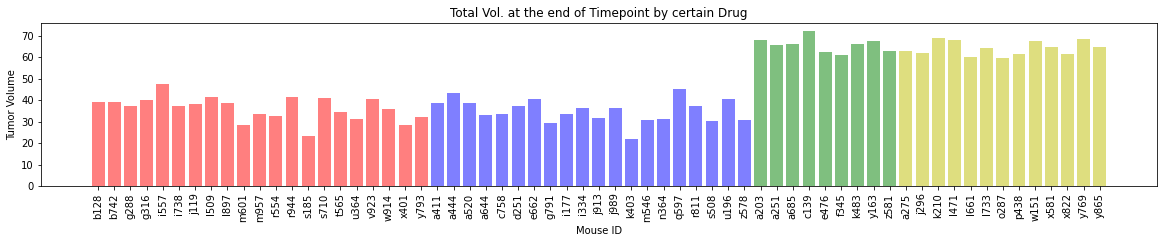

In [854]:
treatment_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']
# Set x axis and tick locations
x_axis = np.arange(len(merged_four_drugs))
tick_locations = [value for value in x_axis]
colors = {'Capomulin': 'r', 'Ramicane': 'b', 'Infubinol': 'g', 'Ceftamin': 'y'}

# Create a list indicating where to write x labels and set figure size to adjust for space

plt.figure(figsize=(20,3))
plt.bar(x_axis, merged_four_drugs["Tumor Volume (mm3)"], color=[colors[i] for i in merged_four_drugs['Drug Regimen']], alpha=0.5, align="center")
# plt.legend(['Capomulin','Ramicane','Infubinol','Ceftamin'])

plt.xticks(tick_locations, merged_four_drugs["Mouse ID"], rotation="vertical")

plt.title('Total Vol. at the end of Timepoint by certain Drug')
plt.xlabel('Mouse ID')
plt.ylabel('Tumor Volume')

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/Four_Drugs_Tot_pyplot_bar.png")
plt.show()

#### Capomulin Drug Chart of Tumor Volume

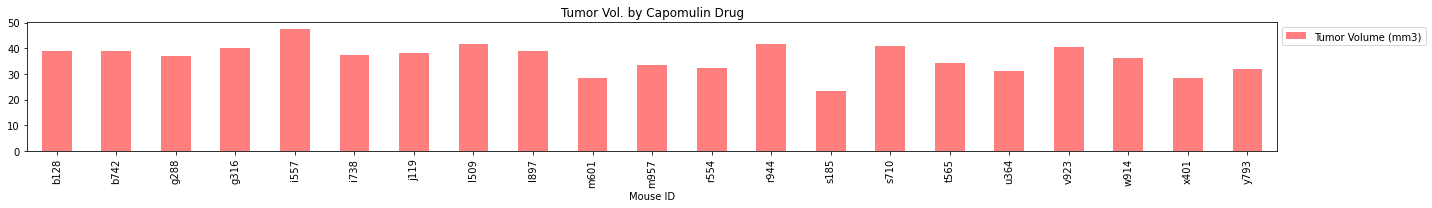

In [855]:
maximum_of_capomulin.set_index('Mouse ID')

# Filter the DataFrame down only to those columns to chart
capomulin_graph = maximum_of_capomulin[["Mouse ID","Tumor Volume (mm3)"]]

# Set the index to be "State" so they will be used as labels
capomulin_graph = capomulin_graph.set_index("Mouse ID")

capomulin_graph.head()

# Use DataFrame.plot() in order to create a bar chart of the data
capomulin_graph.plot(kind="bar", color='r', alpha=0.5, figsize=(20,3))

# Set a title for the chart
plt.title("Tumor Vol. by Capomulin Drug")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()

# Save an image of the chart and print it to the screen
plt.savefig("Images/Capomulin_Drug.png")


#### Ramicane Drug Chart of Tumor Volume

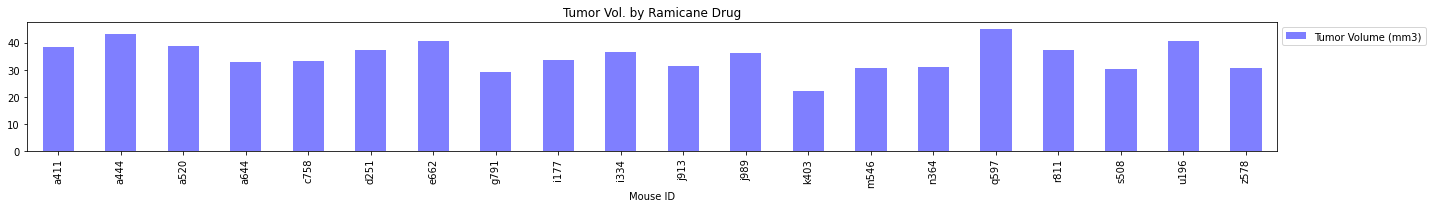

In [856]:
maximum_of_ramicane.set_index('Mouse ID')

# Filter the DataFrame down only to those columns to chart
ramicane_graph = maximum_of_ramicane[["Mouse ID","Tumor Volume (mm3)"]]

# Set the index to be "State" so they will be used as labels
ramicane_graph = ramicane_graph.set_index("Mouse ID")

ramicane_graph.head()

# Use DataFrame.plot() in order to create a bar chart of the data
ramicane_graph.plot(kind="bar", color='b', alpha=0.5, figsize=(20,3))

# Set a title for the chart
plt.title("Tumor Vol. by Ramicane Drug")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()

# Save an image of the chart and print it to the screen
plt.savefig("Images/Ramicane_Drug.png")

#### Infubinol Drug Chart of Tumor Volume

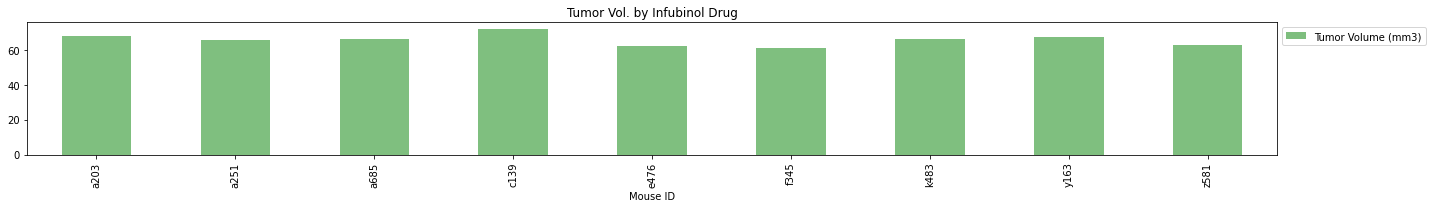

In [857]:
maximum_of_infubinol.set_index('Mouse ID')

# Filter the DataFrame down only to those columns to chart
infubinol_graph = maximum_of_infubinol[["Mouse ID","Tumor Volume (mm3)"]]

# Set the index to be "State" so they will be used as labels
infubinol_graph = infubinol_graph.set_index("Mouse ID")

infubinol_graph.head()

# Use DataFrame.plot() in order to create a bar chart of the data
infubinol_graph.plot(kind="bar", color='g', alpha=0.5, figsize=(20,3))

# Set a title for the chart
plt.title("Tumor Vol. by Infubinol Drug")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()

# Save an image of the chart and print it to the screen
plt.savefig("Images/Infubinol_Drug.png")

#### Ceftamin Drug Chart of Tumor Volume

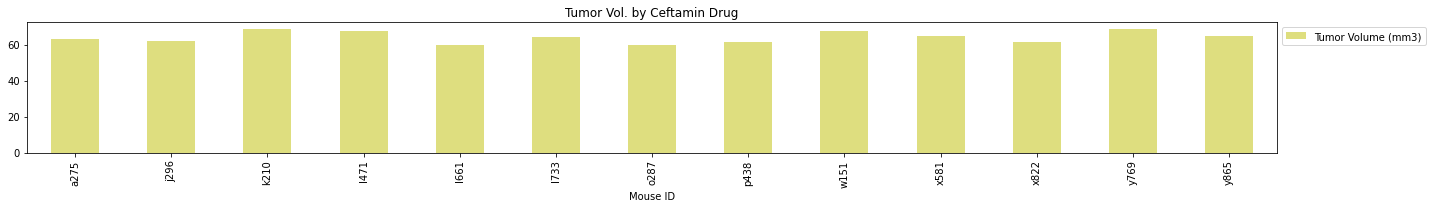

In [858]:
maximum_of_ceftamin.set_index('Mouse ID')

# Filter the DataFrame down only to those columns to chart
ceftamin_graph = maximum_of_ceftamin[["Mouse ID","Tumor Volume (mm3)"]]

# Set the index to be "State" so they will be used as labels
ceftamin_graph = ceftamin_graph.set_index("Mouse ID")

ceftamin_graph.head()

# Use DataFrame.plot() in order to create a bar chart of the data
ceftamin_graph.plot(kind="bar", color='y', alpha=0.5, figsize=(20,3))

# Set a title for the chart
plt.title("Tumor Vol. by Ceftamin Drug")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()

# Save an image of the chart and print it to the screen
plt.savefig("Images/Ceftamin_Drug.png")

#### Box Plot

The lower quartile of tumor volume is: 33.48002734
The upper quartile of tumor volume is: 62.14221369
The interquartile range of tumor volume is: 28.66218635
The the median of tumor volume is: 40.1592203 
Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.


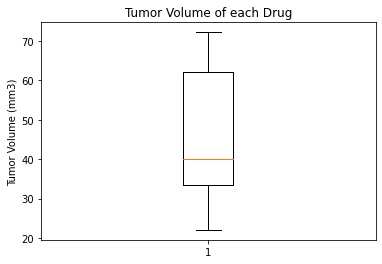

In [859]:
# The second example again looks at the LAX temperature data set and computes quantiles
drug_col = merged_four_drugs['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of each Drug')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(drug_col)
# plt.show()

# Save an image of the chart and print it to the screen
plt.savefig("Images/Four_Drug_boxplot.png")

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = drug_col.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

### Scatter Plots